In [1]:
from cobaya.yaml import yaml_load_file
import getdist.plots as gdplt
import getdist
import os, fnmatch
from cobaya import load_samples
import numpy as np
%matplotlib inline 

In [2]:
grid_root_dir = '/home/fverdian/cobaya/chains-grids/ULAs_m_largerprior'

Samples={}

for root, dirs, files in os.walk(grid_root_dir):
    for chain_name in fnmatch.filter(dirs, 'base_*'):
        # if chain_name == 'base_m30': continue
        print(chain_name)
        subdirs = next(os.walk(os.path.join(root, chain_name)))[1]
        only_subdir = subdirs[0]
        subdir_path = os.path.join(root, chain_name, only_subdir)
        Samples[chain_name] = load_samples(subdir_path+'/'+chain_name+'_'+only_subdir, to_getdist=True)
        Samples[chain_name].label = chain_name

base_m24
base_m25
base_m26
base_m27
base_m28
base_m29
base_m30


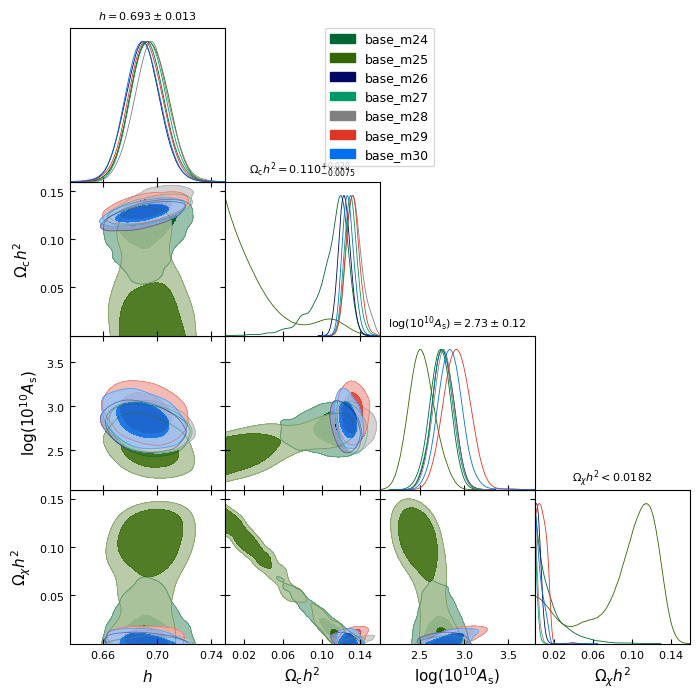

In [3]:

pars_toplot =['h','omega_cdm', 'logA', 'omega_chi']
chains_to_plot=list(Samples.values())

gdplot = gdplt.get_subplot_plotter()

gdplot.triangle_plot(chains_to_plot ,  pars_toplot, title_limit=1, filled=True)
# gdplot.finish_plot(no_tight=True)

In [4]:
for samp in chains_to_plot:
    print(samp.label[5:],'-->', samp.getInlineLatex('omega_chi',limit=2))


m24 --> \Omega_\chi h^2 < 0.0511
m25 --> \Omega_\chi h^2 < 0.131
m26 --> \Omega_\chi h^2 < 0.00948
m27 --> \Omega_\chi h^2 < 0.00551
m28 --> \Omega_\chi h^2 < 0.00671
m29 --> \Omega_\chi h^2 < 0.0156
m30 --> \Omega_\chi h^2 < 0.0134


0.16
[0.051074421, 0.13059102, 0.0094773271, 0.0055081018, 0.00671363, 0.015642255, 0.013391776]
[-24, -25, -26, -27, -28, -29, -30] , [0.051074421, 0.13059102, 0.0094773271, 0.0055081018, 0.00671363, 0.015642255, 0.013391776]


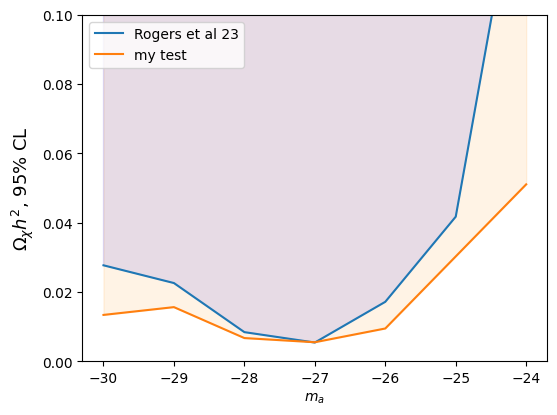

In [20]:
import matplotlib.pyplot as plt
print(chains_to_plot[0].getUpper('omega_chi'))
mvals = [-24, -25, -26, -27, -28,-29, -30]
Rogers = [0.155,0.04174,0.01717,0.00542,0.00842,0.02259,0.02771]
lims0 = chains_to_plot[0].getMargeStats().parWithName('omega_chi').limits[1].upper
my2lims=[]
for samp in chains_to_plot:
    my2lims.append(samp.getMargeStats().parWithName('omega_chi').limits[1].upper)
print(repr(my2lims))
plt.figure(figsize=(6,4.5))
plt.plot(mvals, Rogers, label='Rogers et al 23')
plt.fill_between(mvals, Rogers, y2=0.1, interpolate=True, color='b', alpha=0.1)
print(mvals,',', my2lims)
plt.plot([-24, -26, -27, -28, -29, -30] , [0.051074421,0.0094773271, 0.0055081018, 0.00671363, 0.015642255, 0.013391776], label='my test')

plt.fill_between([-24, -26, -27, -28, -29, -30] , [0.051074421,0.0094773271, 0.0055081018, 0.00671363, 0.015642255, 0.013391776], y2=0.1, interpolate=True, color='darkorange', alpha=0.1)

plt.ylim([0.,0.1])
plt.xlabel(r'$m_a$')
plt.ylabel(r'$\Omega_\chi h^2$, 95% CL', fontsize=13)
plt.legend()
plt.show()